In [1]:
from netCDF4 import Dataset                     # For reading data
import matplotlib.pyplot as plt                 # For plotting
import numpy.ma as ma
# Place figures within document
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 10.0) # Large figures

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load data
layerVolumeAverageFile = Dataset('../testData/layer_volume_weighted_averages.all.nc')
#print layerVolumeAverageFile
nTime = len(layerVolumeAverageFile.dimensions['Time'])
nOceanRegions = len(layerVolumeAverageFile.dimensions['nOceanRegionsTmp'])
nVertLevels = len(layerVolumeAverageFile.dimensions['nVertLevels'])
k=range(nVertLevels,0,-1)
print 'nTime: ', nTime
print 'nVertLevels: ', nVertLevels
print 'nOceanRegions: ', nOceanRegions

temperatureProfile = layerVolumeAverageFile.variables['avgLayerTemperature'][:,:,:]
print 'number of dimensions in temperatureProfile: ', temperatureProfile.ndim
print 'size of temperatureProfile: ', temperatureProfile.shape

nTime:  33
nVertLevels:  100
nOceanRegions:  7
number of dimensions in temperatureProfile:  3
size of temperatureProfile:  (33, 7, 100)


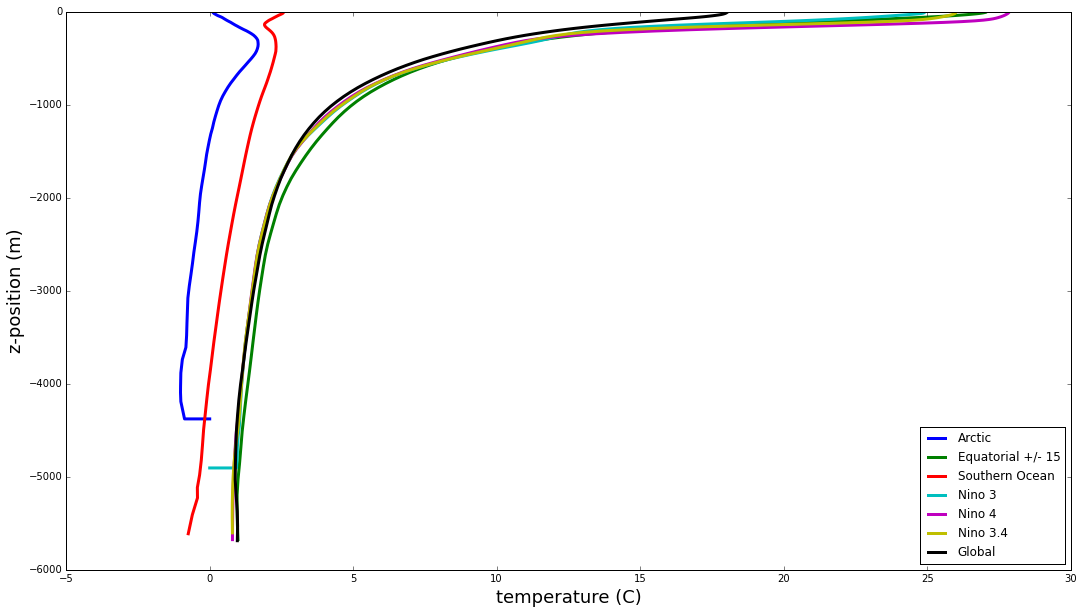

In [3]:
iTime = 30;
for iRegion in range(0,nOceanRegions):
    layerProfile = layerVolumeAverageFile.variables['avgLayerThickness'][iTime,iRegion,:];
    zMid = np.cumsum(layerProfile) - 0.5*layerProfile[0]
    zMid = -1.0 * zMid
    temperatureProfile = layerVolumeAverageFile.variables['avgLayerTemperature'][iTime,iRegion,:];
    plt.plot(temperatureProfile,zMid,linewidth=3);
    plt.xlabel('temperature (C)', fontsize=18); plt.ylabel('z-position (m)', fontsize=18);
    plt.legend(['Arctic', 'Equatorial +/- 15', 'Southern Ocean', 'Nino 3', 'Nino 4', 'Nino 3.4', 'Global'], loc='lower right');

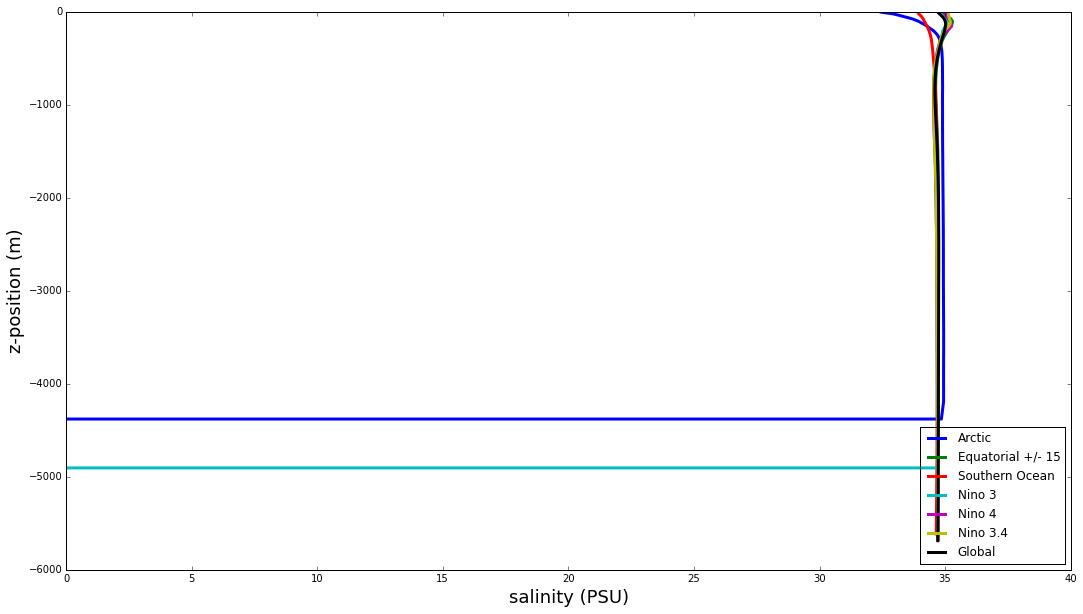

In [4]:
iTime = 0;
for iRegion in range(0,nOceanRegions):
    salinityProfile = layerVolumeAverageFile.variables['avgLayerSalinity'][iTime,iRegion,:];
    layerProfile = layerVolumeAverageFile.variables['avgLayerThickness'][iTime,iRegion,:];
    zMid = np.cumsum(layerProfile) - 0.5*layerProfile[0]
    zMid = -1.0 * zMid
    plt.plot(salinityProfile,zMid,linewidth=3);
    plt.xlabel('salinity (PSU)', fontsize=18); plt.ylabel('z-position (m)', fontsize=18);
    plt.legend(['Arctic', 'Equatorial +/- 15', 'Southern Ocean', 'Nino 3', 'Nino 4', 'Nino 3.4', 'Global'], loc='lower right');

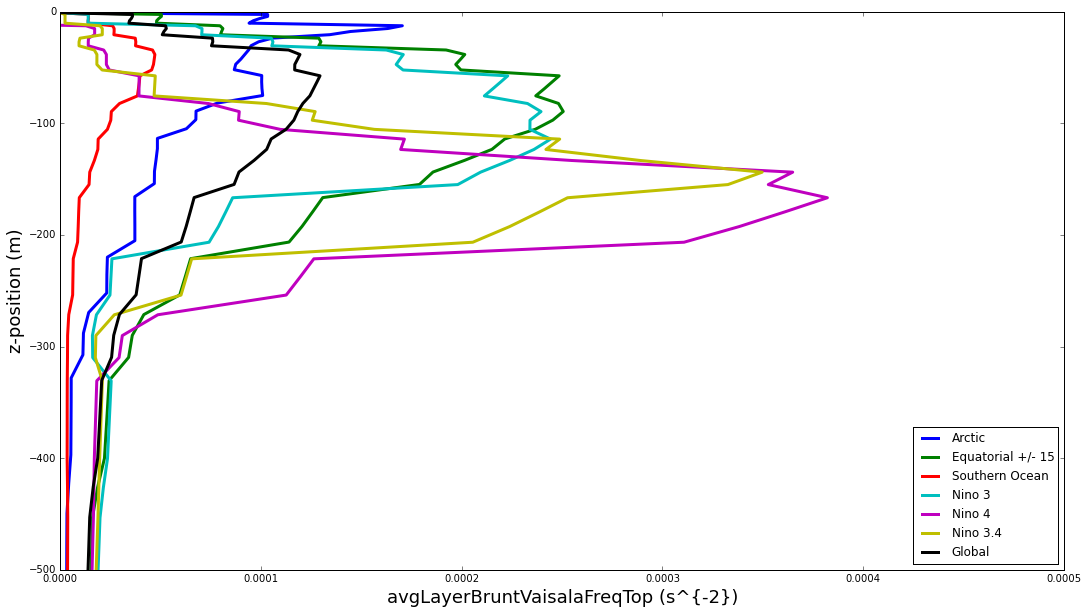

In [5]:
iTime = 0;
for iRegion in range(0,nOceanRegions):
    avgLayerBruntVaisalaFreqTop = layerVolumeAverageFile.variables['avgLayerBruntVaisalaFreqTop'][iTime,iRegion,:];
    layerProfile = layerVolumeAverageFile.variables['avgLayerThickness'][iTime,iRegion,:];
    zMid = np.cumsum(layerProfile) - 0.5*layerProfile[0]
    zMid = -1.0 * zMid
    plt.plot(avgLayerBruntVaisalaFreqTop,zMid,linewidth=3);
    plt.xlabel('avgLayerBruntVaisalaFreqTop (s^{-2})', fontsize=18); plt.ylabel('z-position (m)', fontsize=18);
    plt.legend(['Arctic', 'Equatorial +/- 15', 'Southern Ocean', 'Nino 3', 'Nino 4', 'Nino 3.4', 'Global'], loc='lower right');
    plt.axis([1.0e-8, 5.0e-4, -500, 0])